In [25]:
import numpy as np
from CADMium import Psgrid
from CADMium import Kohnsham
import matplotlib.pyplot as plt

In [35]:
dis_eq      = np.linspace(1.0,5,30)
dis_st      = np.linspace(5.1,10,10)
distances   = np.concatenate((dis_eq, dis_st))
lda_energy  = []

Za, Zb = 1,1
Nmo = [[1,0]]
N   = [[1,0]]
pol = 2
NP, NM = 7, [4,4] 
optKS = {"xc_family"  : "lda",
         "xfunc_id"   : 1,   
         "cfunc_id"   : 12,
         "sym"        : True,
         "fractional" : False}


for d in distances:
    #Initialize Grid and Separation
    a =  d/2
    L = np.arccosh(10./a) 
    loc = np.array(range(-4,5))
    grid = Psgrid(NP, NM, a, L, loc)
    grid.initialize()

    #Kohn Sham Object. SCF Calcualtion
    KS = Kohnsham(grid, Za, Zb, pol, Nmo, N, optKS)
    KS.scf({"disp" : False})
    lda_energy.append(KS.E.E)
    print(f" Distance: {d} -> Energy: {KS.E.E}")
    
energy    = np.array(lda_energy)
np.save('h2plus_distance.npy', distances)
np.save('h2plus_lda.npy', lda_energy)

/mnt/c/Users/victo/Dropbox/PHD/cadmium/CADMium/CADMium/kohnsham/scf.py:99: RuntimeWarning: invalid value encountered in true_divide
  dif_n = np.max(  self.grid.integrate(np.abs(self.n - old_n)) / self.grid.integrate(np.abs(self.n))  )


 Distance: 1.0 -> Energy: -0.4145683783488223
 Distance: 1.1379310344827587 -> Energy: -0.47568922209238373
 Distance: 1.2758620689655173 -> Energy: -0.5161588699357786
 Distance: 1.4137931034482758 -> Energy: -0.5430750738553992
 Distance: 1.5517241379310345 -> Energy: -0.5608352742997781
 Distance: 1.6896551724137931 -> Energy: -0.572286799708926
 Distance: 1.8275862068965516 -> Energy: -0.5793186586685862
 Distance: 1.9655172413793103 -> Energy: -0.5832483470435494
 Distance: 2.103448275862069 -> Energy: -0.5849681825610669
 Distance: 2.2413793103448274 -> Energy: -0.5851247032649087
 Distance: 2.3793103448275863 -> Energy: -0.584190041325282
 Distance: 2.5172413793103448 -> Energy: -0.582499765526698
 Distance: 2.655172413793103 -> Energy: -0.5803082359628977
 Distance: 2.793103448275862 -> Energy: -0.5778025962083684
 Distance: 2.9310344827586206 -> Energy: -0.5751256071726312
 Distance: 3.0689655172413794 -> Energy: -0.5723756794966852
 Distance: 3.206896551724138 -> Energy: -0.5

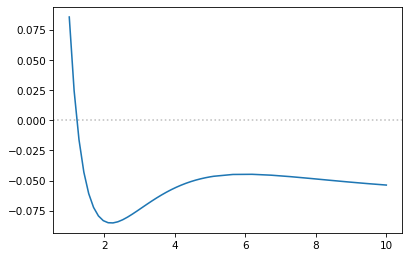

In [37]:
h_energy  = -0.25 
energy    = np.array(lda_energy)

fig, ax = plt.subplots(1,1, dpi=75)

ax.axhline(y=0, alpha=0.5, c="grey", ls=":")
ax.plot(distances, energy - 2*h_energy)
# ax.set_ylim(-1.2,-0.1)